## Data Preparation

In [28]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
import torch
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import rc

In [29]:
#get labels
data = pd.read_csv("Datasets/Normalized_CWE-469.csv")
#get embeddings 
x= pd.read_csv("graph2vec/features/embledding_cwe_469.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5250 non-null   int64 
 1   testID      5250 non-null   int64 
 2   filename    5250 non-null   object
 3   code        5250 non-null   object
 4   vuln        5250 non-null   bool  
 5   type        5250 non-null   object
dtypes: bool(1), int64(2), object(3)
memory usage: 210.3+ KB


In [30]:
x.head()

,type,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,0,-0.086220,-0.183489,-0.311828,0.210561,-0.011794,0.046493,-0.247115,0.002444,-0.054876,...,0.136654,0.208798,0.118810,0.194054,0.098417,-0.000896,-0.060261,0.012516,0.089105,-0.105244
1,1,0.050206,-0.533095,-0.311225,0.058918,-0.018652,-0.024216,-0.350888,-0.090321,0.005125,...,0.236584,0.052393,-0.022136,0.186589,0.007961,-0.023393,0.154599,-0.031407,-0.102472,-0.181720
2,10,-0.023950,-0.167754,-0.200610,0.141800,-0.017827,-0.013925,-0.161392,-0.095699,0.004724,...,0.096194,0.076208,0.018431,0.087224,0.073983,-0.024665,-0.001303,-0.029866,0.062740,-0.076197
3,100,-0.008526,-0.158457,-0.380494,0.172831,0.048501,-0.012732,-0.286329,-0.010031,-0.268125,...,0.191623,0.287033,-0.020448,0.148487,0.040430,-0.068902,-0.027892,0.025348,0.106796,-0.069266
4,1000,0.005788,-0.437232,-0.307672,0.062768,-0.005194,-0.015667,-0.310069,-0.057550,-0.023266,...,0.232327,0.029678,-0.008981,0.134089,0.028003,-0.011975,0.156055,-0.036535,-0.023201,-0.182217


In [31]:
# Get the type column index before it's dropped
indices = x['type'].values
y = data.iloc[:, 4]
y_labels = y.iloc[indices]
y_labels.head()

0       False
1        True
10      False
100     False
1000     True
Name: vuln, dtype: bool

In [32]:
x = x.drop(columns="type")
x.head()

,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_118,x_119,x_120,x_121,x_122,x_123,x_124,x_125,x_126,x_127
0,-0.086220,-0.183489,-0.311828,0.210561,-0.011794,0.046493,-0.247115,0.002444,-0.054876,0.163939,...,0.136654,0.208798,0.118810,0.194054,0.098417,-0.000896,-0.060261,0.012516,0.089105,-0.105244
1,0.050206,-0.533095,-0.311225,0.058918,-0.018652,-0.024216,-0.350888,-0.090321,0.005125,0.200890,...,0.236584,0.052393,-0.022136,0.186589,0.007961,-0.023393,0.154599,-0.031407,-0.102472,-0.181720
2,-0.023950,-0.167754,-0.200610,0.141800,-0.017827,-0.013925,-0.161392,-0.095699,0.004724,0.130106,...,0.096194,0.076208,0.018431,0.087224,0.073983,-0.024665,-0.001303,-0.029866,0.062740,-0.076197
3,-0.008526,-0.158457,-0.380494,0.172831,0.048501,-0.012732,-0.286329,-0.010031,-0.268125,0.163671,...,0.191623,0.287033,-0.020448,0.148487,0.040430,-0.068902,-0.027892,0.025348,0.106796,-0.069266
4,0.005788,-0.437232,-0.307672,0.062768,-0.005194,-0.015667,-0.310069,-0.057550,-0.023266,0.175896,...,0.232327,0.029678,-0.008981,0.134089,0.028003,-0.011975,0.156055,-0.036535,-0.023201,-0.182217


In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y_labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4200, 128) (1050, 128) (4200,) (1050,)


## SVM

Training a linear SVM with default parameters

In [34]:
svm_clf = Pipeline((
 ("scaler", StandardScaler()),
 ("linear_svc", LinearSVC(C=1, loss="hinge")),
 ))
svm_clf.fit(X_train, y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [35]:
y_pred_svm=svm_clf.predict(X_test)

Plotting the cofusion matrix and performance metrics

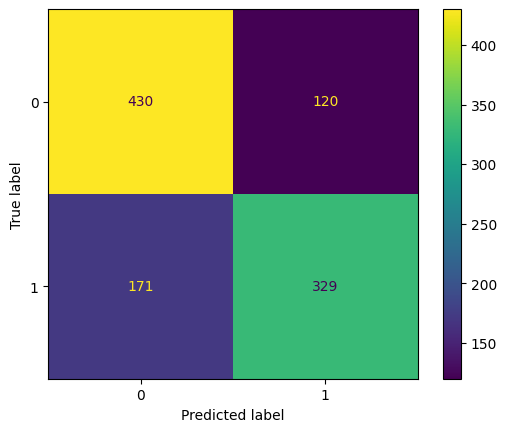

 Accuracy : 0.7228571428571429 
 Precision : 0.732739420935412 
 Recall : 0.658 
 F1 : 0.6933614330874605 


In [36]:
# Display confusion matrix
cm_SVM = confusion_matrix(y_test, y_pred_svm)
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp_SVM.plot()
plt.show()

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
precision_SVM = precision_score(y_test, y_pred_svm, zero_division=1)
recall_SVM = recall_score(y_test, y_pred_svm, zero_division=1)
F1_SVM = f1_score(y_test, y_pred_svm, zero_division=1)
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2} \n F1 : {3} ".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))

## XGBoost

In [37]:
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# 6️⃣ Initialize XGBoost classifier
model = xgb.XGBClassifier(
    objective="multi:softmax",  # Multi-class classification
    eval_metric="mlogloss",  # Log loss for classification
    use_label_encoder=False,
    num_class=len(np.unique(y)),  # Number of classes
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=6,  # Depth of trees
    subsample=0.8,  # Prevents overfitting
    colsample_bytree=0.8,  # Features per tree
    random_state=42
)

# 7️⃣ Train the model
print("\nTraining the XGBoost model...")
model.fit(X_train, y_train)

# 8️⃣ Make predictions
y_pred_XG = model.predict(X_test)

# 9️⃣ Evaluate the model
accuracy = accuracy_score(y_test, y_pred_XG)
print(f"\nModel Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_XG))

/opt/homebrew/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [16:22:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Training the XGBoost model...

Model Accuracy: 0.7581

Classification Report:
              precision    recall  f1-score   support

       False       0.78      0.76      0.77       550
        True       0.74      0.76      0.75       500

    accuracy                           0.76      1050
   macro avg       0.76      0.76      0.76      1050
weighted avg       0.76      0.76      0.76      1050



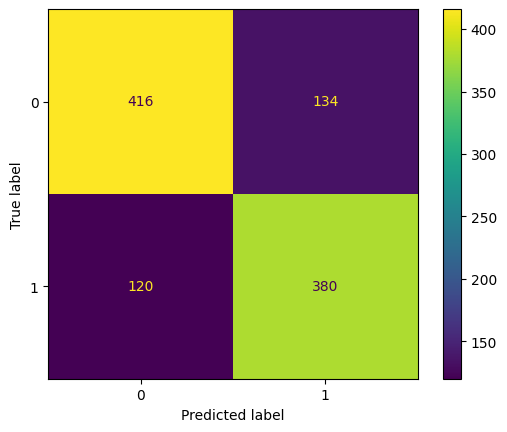

 Accuracy : 0.7581 
 Precision : 0.7586 
 Recall : 0.7581 
 F1 : 0.7582 


In [ ]:
# Compute confusion matrix
cm_XG = confusion_matrix(y_test, y_pred_XG)

# Display confusion matrix
disp_XG = ConfusionMatrixDisplay(confusion_matrix=cm_XG)
disp_XG.plot()
plt.show()

# Compute performance metrics
accuracy_XG = accuracy_score(y_test, y_pred_XG)
precision_XG = precision_score(y_test, y_pred_XG, average="weighted", zero_division=1)
recall_XG = recall_score(y_test, y_pred_XG, average="weighted", zero_division=1)
F1_XG = f1_score(y_test, y_pred_XG, average="weighted", zero_division=1)

print(" Accuracy : {0:.4f} \n Precision : {1:.4f} \n Recall : {2:.4f} \n F1 : {3:.4f} ".format(accuracy_XG, precision_XG, recall_XG, F1_XG))

## Comparison of SVM and XGBoost

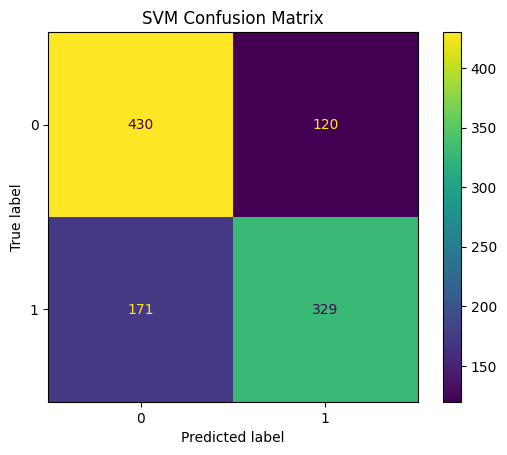


🔹 **SVM Performance Metrics:**
 Accuracy : 0.7229 
 Precision : 0.7237 
 Recall : 0.7229 
 F1 Score : 0.7216


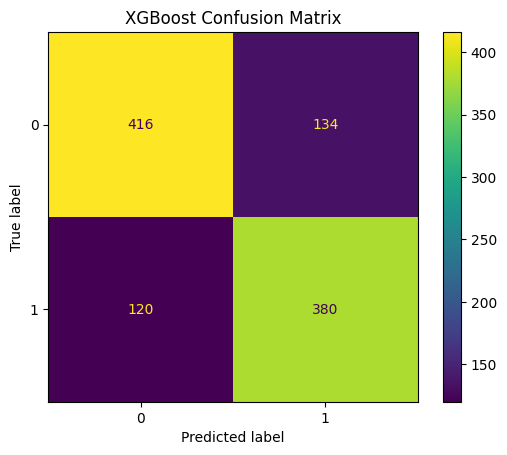


🔹 **XGBoost Performance Metrics:**
 Accuracy : 0.7581 
 Precision : 0.7586 
 Recall : 0.7581 
 F1 Score : 0.7582

📊 **Comparison Summary:**
 Model      | Accuracy  | Precision | Recall   | F1 Score 
-----------|-----------|-----------|-----------|-----------
 SVM       | 0.7229   | 0.7237   | 0.7229   | 0.7216
 XGBoost   | 0.7581   | 0.7586   | 0.7581   | 0.7582


In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# SVM Performance Metrics & Confusion Matrix
cm_SVM = confusion_matrix(y_test, y_pred_svm)
disp_SVM = ConfusionMatrixDisplay(confusion_matrix=cm_SVM)
disp_SVM.plot()
plt.title("SVM Confusion Matrix")
plt.show()

accuracy_SVM = accuracy_score(y_test, y_pred_svm)
precision_SVM = precision_score(y_test, y_pred_svm, average="weighted", zero_division=1)
recall_SVM = recall_score(y_test, y_pred_svm, average="weighted", zero_division=1)
F1_SVM = f1_score(y_test, y_pred_svm, average="weighted", zero_division=1)

print("\n🔹 **SVM Performance Metrics:**")
print(" Accuracy : {:.4f} \n Precision : {:.4f} \n Recall : {:.4f} \n F1 Score : {:.4f}".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))

# XGBoost Performance Metrics & Confusion Matrix
cm_XG = confusion_matrix(y_test, y_pred_XG)
disp_XG = ConfusionMatrixDisplay(confusion_matrix=cm_XG)
disp_XG.plot()
plt.title("XGBoost Confusion Matrix")
plt.show()

accuracy_XG = accuracy_score(y_test, y_pred_XG)
precision_XG = precision_score(y_test, y_pred_XG, average="weighted", zero_division=1)
recall_XG = recall_score(y_test, y_pred_XG, average="weighted", zero_division=1)
F1_XG = f1_score(y_test, y_pred_XG, average="weighted", zero_division=1)

print("\n🔹 **XGBoost Performance Metrics:**")
print(" Accuracy : {:.4f} \n Precision : {:.4f} \n Recall : {:.4f} \n F1 Score : {:.4f}".format(accuracy_XG, precision_XG, recall_XG, F1_XG))

# Compare results side by side
print("\n📊 **Comparison Summary:**")
print(" Model      | Accuracy  | Precision | Recall   | F1 Score ")
print("-----------|-----------|-----------|-----------|-----------")
print(" SVM       | {:.4f}   | {:.4f}   | {:.4f}   | {:.4f}".format(accuracy_SVM, precision_SVM, recall_SVM, F1_SVM))
print(" XGBoost   | {:.4f}   | {:.4f}   | {:.4f}   | {:.4f}".format(accuracy_XG, precision_XG, recall_XG, F1_XG))